In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math
import random

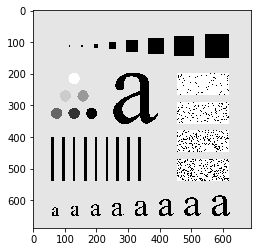

In [2]:
smoothing = cv2.imread('smoothing.tif',0)
plt.imshow(smoothing, cmap='gray')

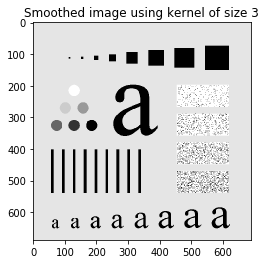

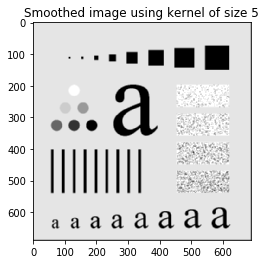

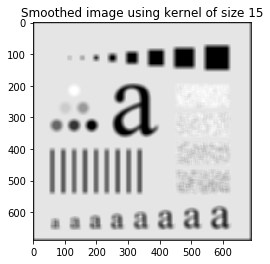

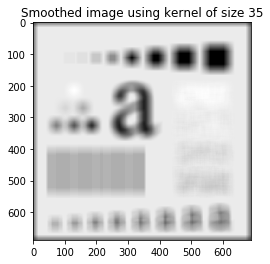

True

In [86]:
#TASK NO 1

def Spatial_Filter(img, size):
    kernel = np.ones((size,size), np.float)
    padding = int((size-1)/2)
    padded_img = np.pad(img, ((padding, padding), (padding,padding)), 'constant')
    height, width = img.shape
    for x in range(width):
        for y in range(height):
            img[x][y]= (np.sum(padded_img[x:x+size,y:y+size]))/(size* size)
    return img


smoothing = cv2.imread('smoothing.tif',0)
smooth_img_k3 = Spatial_Filter(smoothing,3) 
plt.imshow(smooth_img_k3, cmap='gray')
plt.title('Smoothed image using kernel of size 3')
plt.show()
cv2.imwrite('smooth_img_k3.jpg', smooth_img_k3)

smoothing = cv2.imread('smoothing.tif',0)
smooth_img_k5 = Spatial_Filter(smoothing,5)
plt.imshow(smooth_img_k5, cmap='gray')
plt.title('Smoothed image using kernel of size 5')
plt.show()
cv2.imwrite('smooth_img_k5.jpg', smooth_img_k5)

smoothing = cv2.imread('smoothing.tif',0)
smooth_img_k15 = Spatial_Filter(smoothing,15)
plt.imshow(smooth_img_k15, cmap='gray')
plt.title('Smoothed image using kernel of size 15')
plt.show()
cv2.imwrite('smooth_img_k15.jpg', smooth_img_k15)

smoothing = cv2.imread('smoothing.tif',0)
smooth_img_k35 = Spatial_Filter(smoothing,35)
plt.imshow(smooth_img_k35, cmap='gray')
plt.title('Smoothed image using kernel of size 35')
plt.show()
cv2.imwrite('smooth_img_k35.jpg', smooth_img_k35)

By increasing the size of filter, images become more smooth and blurred and a dark shadow around the images increases because of increase of size of zero padding. 

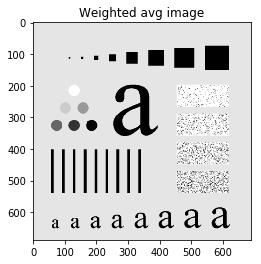

True

In [3]:
#TASK NO 2

def W_Avg_Filter(img,size):
    kernel =  np.array([[1,2,1],[2,4,2],[1,2,1]])
    k_width, k_height = kernel.shape
    padding = int((size-1)/2)
    padded_img = np.pad(img, ((padding, padding), (padding,padding)), 'constant')
    height, width = img.shape
    img1 = np.zeros(img.shape)
    for x in range(width):
        for y in range(height):
            img1[x][y]= (np.sum(np.multiply(padded_img[x:x+k_width,y:y+k_height], kernel)))/16
    return img1

smoothing = cv2.imread('smoothing.tif',0)
Avg_img = W_Avg_Filter(smoothing,3)
plt.imshow(Avg_img, cmap='gray')
plt.title('Weighted avg image')
plt.show()
cv2.imwrite('Avg_img.jpg', Avg_img)

The weighted average filters smooth the image. the average filter applied above is of size 3x3. so it is not giving remarkable results.

In [4]:
#Task No 3
#gaussian filter
def gaussian_filter(img,size):
    kernel =  np.array([[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]])
    k_width, k_height = kernel.shape
    padding = int((size-1)/2)
    padded_img = np.pad(img, ((padding, padding), (padding,padding)), 'constant')
    height, width = img.shape
    img1 = np.zeros(img.shape)
    for x in range(height):
        for y in range(width):   
            img1[x][y]= (np.sum(np.multiply(padded_img[x:x+k_width,y:y+k_height], kernel)))/np.sum(kernel)
    return img1
    
    

    

A Gaussian filter is a linear filter. It's usually used to blur the image or to reduce noise. If you use two of them and subtract, you can use them for "unsharp masking" (edge detection). The Gaussian filter alone will blur edges and reduce contrast.
The role of sigma in the Gaussian filter is to control the variation around its mean value. So as the Sigma becomes larger the more variance allowed around mean and as the Sigma becomes smaller the less variance allowed around mean. Filtering in the spatial domain is done through convolution.

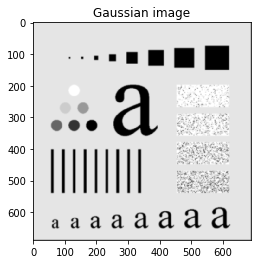

True

In [5]:
smoothing = cv2.imread('smoothing.tif',0)
Gaussian_img = gaussian_filter(smoothing,7)
plt.imshow(Gaussian_img, cmap='gray')
plt.title('Gaussian image')
plt.show()
cv2.imwrite('Gaussian_img.jpg', Gaussian_img)

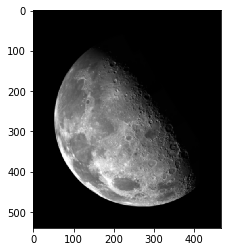

In [6]:
moon = cv2.imread('unsharpmasking.tif',0)
plt.imshow(moon, cmap='gray')

Unsharp masking (USM) is an image sharpening technique, often available in digital image processing software. The "unsharp" of the name derives from the fact that the technique uses a blurred, or "unsharp", negative image to create a mask of the original image.

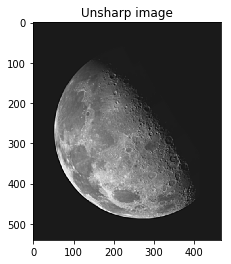

True

In [7]:
#Task no 4
#Unsharp masking
moon = cv2.imread('unsharpmasking.tif',0)
Gaussian_moon_img = gaussian_filter(moon,7)

mask = moon - Gaussian_moon_img
final_img = moon + mask
plt.imshow(final_img, cmap='gray')
plt.title('Unsharp image')
plt.show()
cv2.imwrite('unsharp_img.jpg', final_img)

Median filtering is a nonlinear method used to remove noise from images. It is widely used as it is very effective at removing noise while preserving edges. It is particularly effective at removing 'salt and pepper' type noise. pixel, over the entire image.

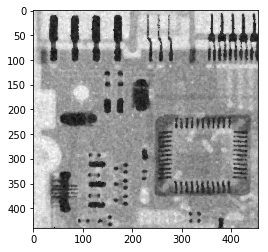

In [8]:
#Task No 5
#Salt and paper noiseremoval
def SnP_filter(img,size):
    height, width = img.shape
    padding = int((size-1)/2)
    padded_img = np.pad(img, ((padding, padding), (padding,padding)), 'constant')
    for x in range(height):
        for y in range(width):   
            img[x][y]= np.median(padded_img[x:x+size,y:y+size])
    return img
saltandpaper =  cv2.imread('saltandpaper.tif', 0)    
Snp_img = SnP_filter(saltandpaper,5)
plt.imshow(Snp_img, cmap='gray')
